In [ ]:
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Machine Learning algorithm
from sklearn.linear_model import LinearRegression

# For splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [326]:
train  = pd.read_csv("D://Projects//Cab Fare Prediction//train_cab_fare.csv")
test   = pd.read_csv("D://Projects//Cab Fare Prediction//test_cab_fare.csv")

In [328]:
train.dropna(inplace=True)

In [8]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [12]:
train.shape

(16067, 7)

In [14]:
test.shape

(9914, 6)

In [16]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [18]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [20]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [22]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [24]:
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors = 'coerce')

In [26]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [28]:
train.shape

(16067, 7)

In [30]:
train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [330]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"], errors="coerce", utc=True)

In [332]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [334]:
train.dtypes

fare_amount                       object
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
Year                             float64
Month                            float64
Date                             float64
Day                              float64
Hour                             float64
Minute                           float64
dtype: object

In [336]:
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

In [338]:
test['Year']=test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [42]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [44]:
#Pickup datetime variable

In [46]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [48]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [50]:
# passenger_count variable

In [52]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [54]:
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [56]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [58]:
train["passenger_count"].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [60]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [62]:
train=train.drop(train[train['passenger_count']==0.12].index, axis=0)

In [64]:
train.shape

(15933, 13)

In [66]:
#fare amount vaiable

In [68]:
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [70]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [72]:
train=train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)

(15930, 13)


In [74]:
train["fare_amount"].min()

0.0

In [76]:
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(15928, 13)

In [78]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15928, dtype: float64

In [80]:
train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(15904, 13)

In [82]:
train=train.drop(train[train["fare_amount"]>453].index, axis=0)
train.shape

(15902, 13)

In [84]:
train['fare_amount'].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [86]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [88]:
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [90]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [92]:
train['pickup_latitude'].sort_values(ascending=False)

3075     41.366138
4487     41.366138
14367    41.366138
6416     41.366138
9808     41.366138
           ...    
3827    -73.988467
4783    -73.991840
9548    -73.992947
10091   -74.006210
8443    -74.006893
Name: pickup_latitude, Length: 15901, dtype: float64

In [94]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [96]:
train.shape

(15901, 13)

In [98]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [100]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [102]:
# Calculating distance based on the given coordinates

In [104]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    km = 6371* c
    return km

In [106]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:6: 

In [108]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1017052334.py:6: 

In [110]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [112]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [114]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [116]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
Year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [118]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [120]:
Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [122]:
Counter(test['distance']==0)

Counter({False: 9829, True: 85})

In [124]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15447, 14)

In [126]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15424, 14)

In [128]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [130]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1)

In [132]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [134]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['Year'] = train['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [136]:
train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [138]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)

In [140]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [142]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['Year'] = test['Year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [144]:
test.dtypes

passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

<Axes: xlabel='passenger_count', ylabel='count'>

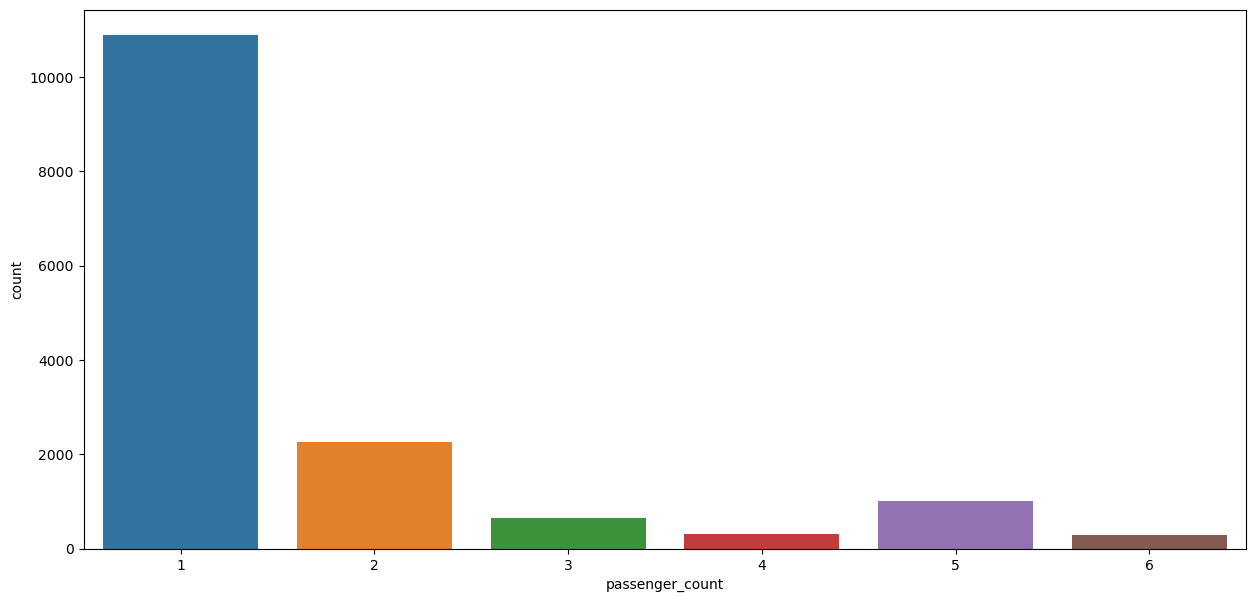

In [146]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

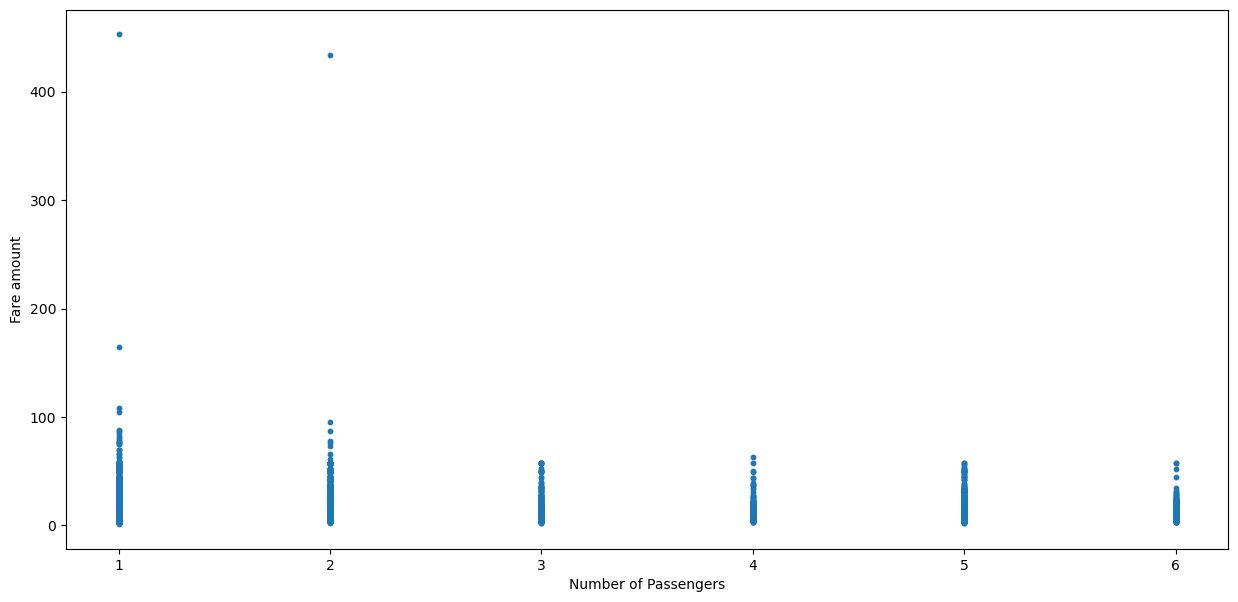

In [147]:
# Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

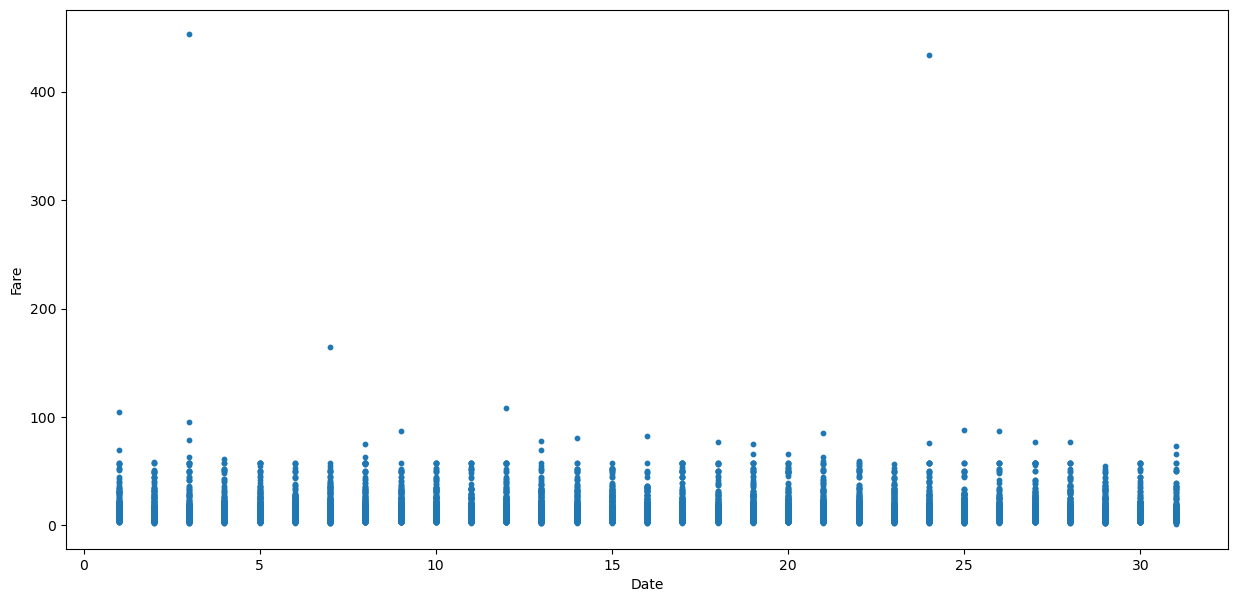

In [149]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

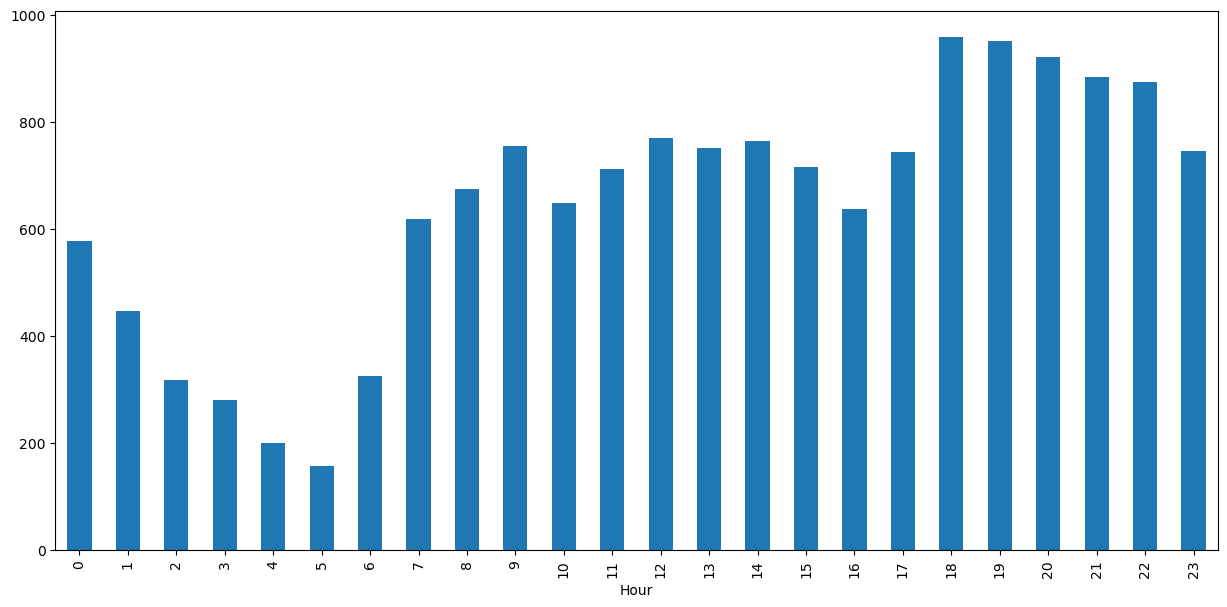

In [151]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()


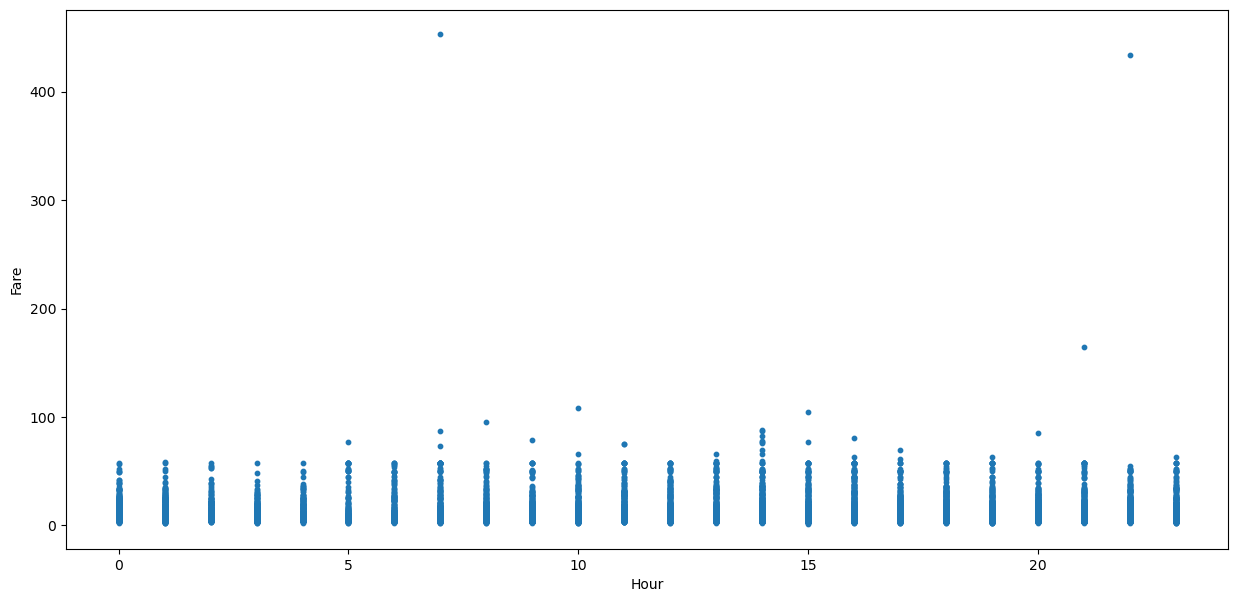

In [153]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Day', ylabel='count'>

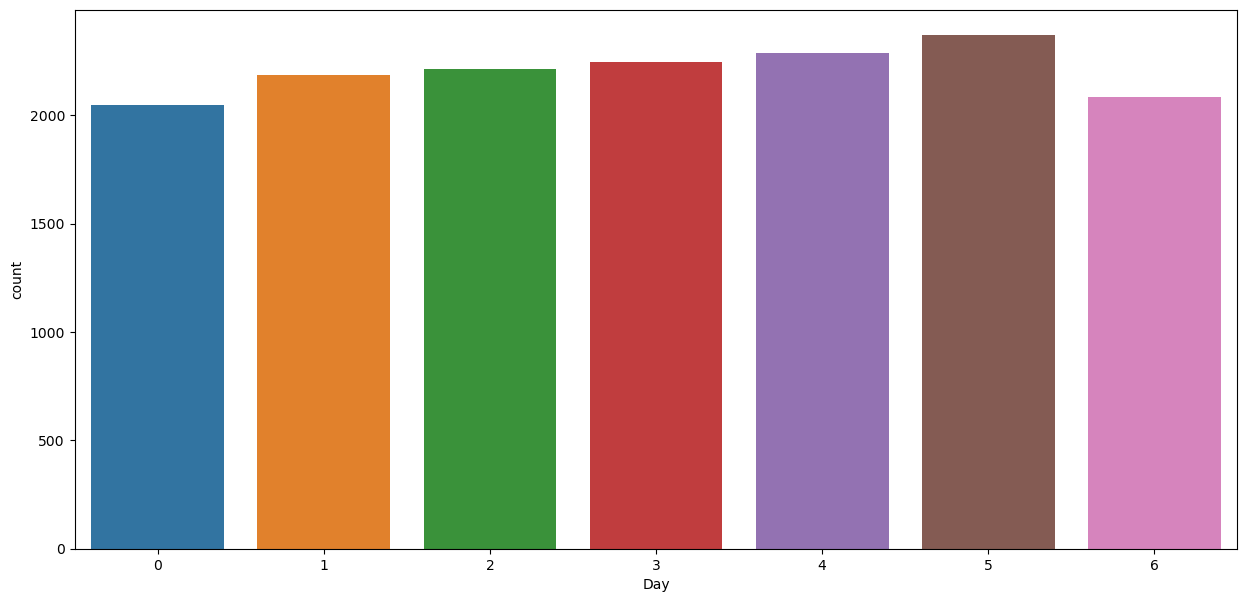

In [155]:
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

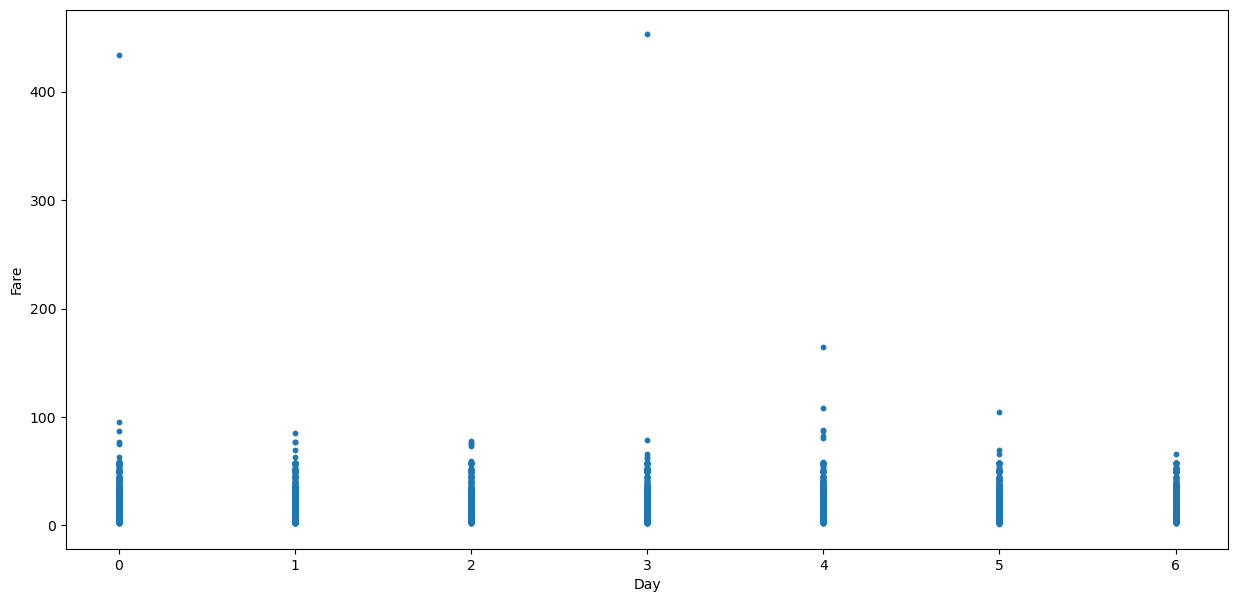

In [157]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

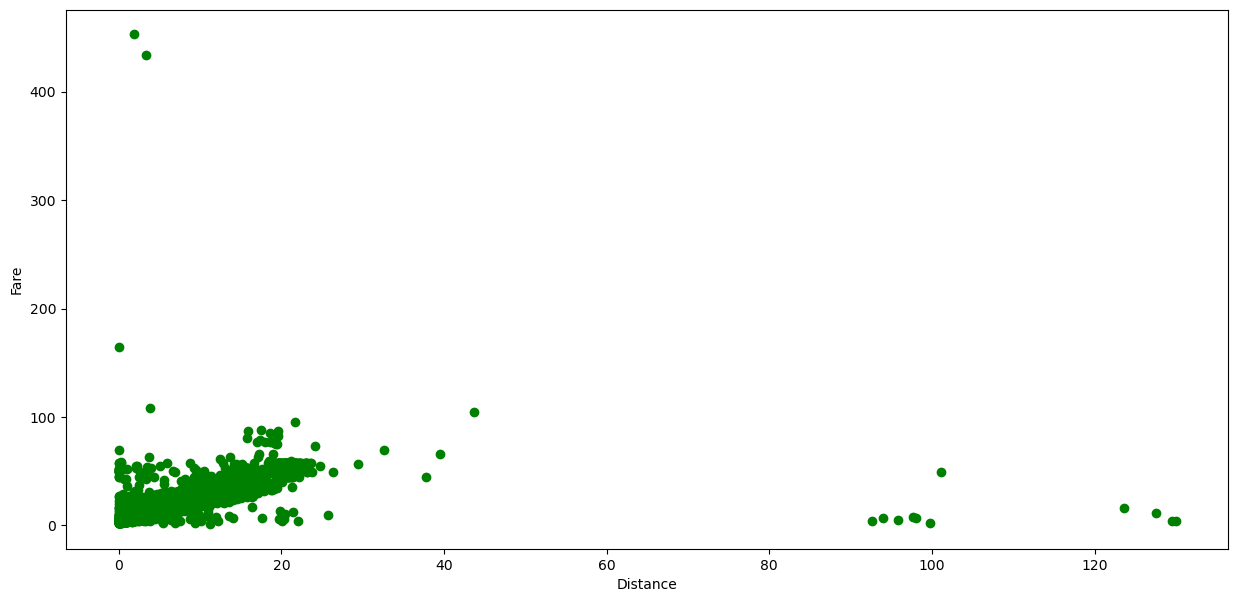

In [160]:
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare_amount


C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1809793121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


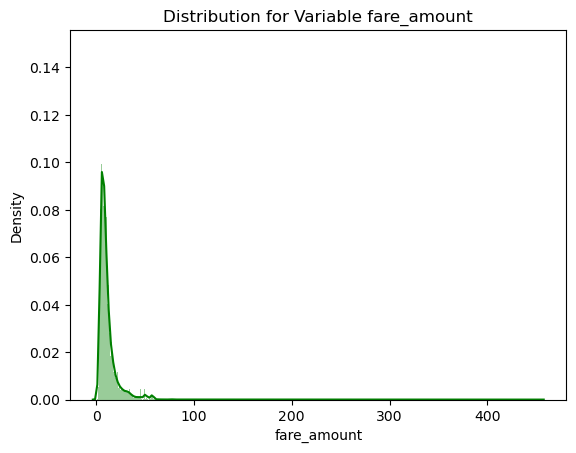

distance


C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1809793121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


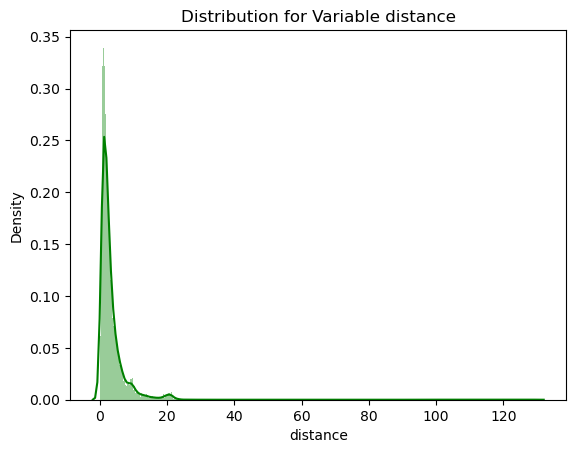

In [161]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [163]:
train['fare_amount'] = np.log1p(train['fare_amount'])

In [164]:
train['distance'] = np.log1p(train['distance'])

fare_amount


C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1809793121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


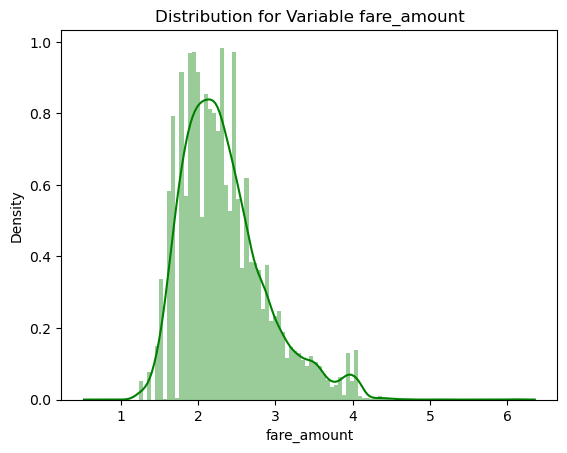

distance


C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\1809793121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


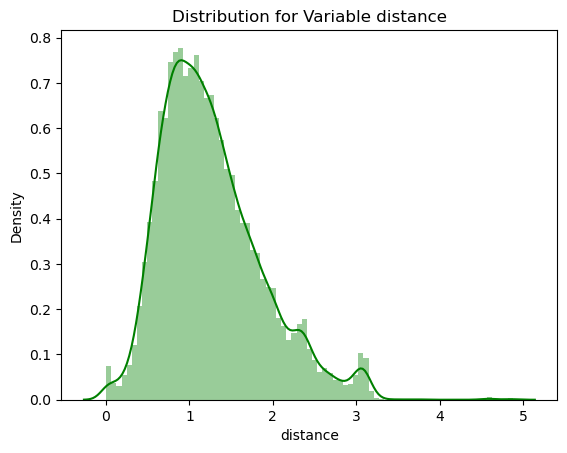

In [165]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\2459526339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['distance'],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


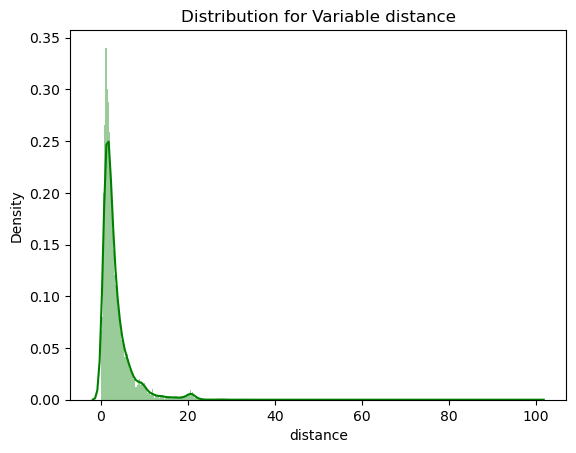

In [166]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [167]:
test['distance'] = np.log1p(test['distance'])

C:\Users\KHUSI\AppData\Local\Temp\ipykernel_18192\2459526339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['distance'],bins='auto',color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


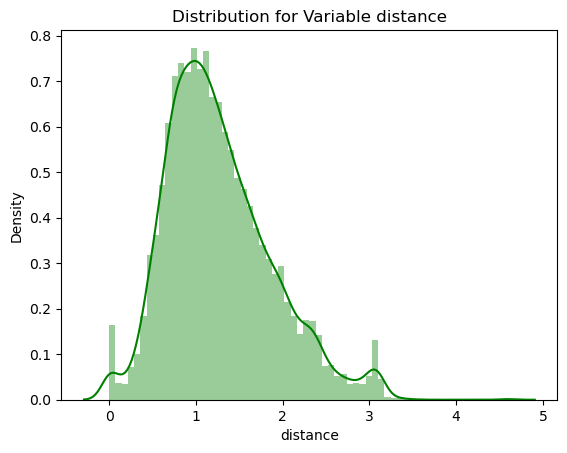

In [168]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [169]:
test1=test.copy()

In [173]:
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [174]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [182]:
#Linear Regression Model

In [184]:
model = LinearRegression().fit(x_train , y_train)

In [186]:
pred_train_LR = model.predict(x_train)

In [188]:
pred_test_LR= model.predict(x_test)

In [190]:
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [192]:
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [194]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 0.2753110017967311
Root Mean Squared Error for Test data = 0.24540661786977663


In [196]:
from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.749550265188041

In [198]:
r2_score(y_test, pred_test_LR)

0.7827019104296612

In [200]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [202]:
pred_train_DT = DT_MODEL.predict(x_train)
pred_test_DT = DT_MODEL.predict(x_test)

In [204]:
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [206]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

Root Mean Squared Error for Train data = 0.29962109020770195
Root Mean Squared Error for Test data = 0.28674606171586187


In [208]:
r2_score(y_train, pred_train_DT)

0.7033678616157002

In [210]:
r2_score(y_test, pred_test_DT)

0.7033268167661031

In [212]:
# Random forest model

In [214]:
RF_MODEL = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [215]:
pred_train_RF = RF_MODEL.predict(x_train)
pred_test_RF = RF_MODEL.predict(x_test)

In [216]:
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [217]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_RF))

Root Mean Squared Error for Train data = 0.09480969105412759
Root Mean Squared Error for Test data = 0.23493779000336798


In [218]:
r2_score(y_train, pred_train_RF)

0.9702984642545567

In [219]:
r2_score(y_test, pred_test_RF)

0.8008459575825229

In [220]:
# Gradient Boosting

In [221]:
GB_MODEL = GradientBoostingRegressor().fit(x_train, y_train)

In [222]:
pred_train_GB = GB_MODEL.predict(x_train)
pred_test_GB = GB_MODEL.predict(x_test)

In [223]:
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [224]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

Root Mean Squared Error for Train data = 0.22754316149645537
Root Mean Squared Error for Test data = 0.22750012918062856


In [236]:
r2_score(y_train, pred_train_GB)

0.8289193000175024

In [238]:
r2_score(y_test, pred_test_GB)

0.8132559974206471

In [240]:
# OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)

In [242]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [244]:
# Random Haperparameter Grid

In [246]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
# Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [248]:
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_rf = randomcv_rf.fit(x_train,y_train)
prediction_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)

In [249]:
RRF_r2 = r2_score(y_test, predictions_RRF)

In [250]:
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

In [251]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.2373410611350033


In [252]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [253]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [254]:
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_gb = randomcv_gb.predict(x_test)


view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

In [255]:
gb_r2 = r2_score(y_test, predictions_gb)
# Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

In [256]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25226513358657066


In [406]:
from sklearn.model_selection import GridSearchCV  

# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [408]:
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

In [410]:
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

In [411]:
predictions_GRF = gridcv_rf.predict(x_test)

In [412]:
GRF_r2 = r2_score(y_test, predictions_GRF)

In [413]:
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [414]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 15}
R-squared = 0.8.
RMSE =  0.23711854543717428


In [415]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [416]:
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [ ]:
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)

gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [ ]:
predictions_Ggb = gridcv_gb.predict(x_test)

In [ ]:
Ggb_r2 = r2_score(y_test, predictions_Ggb)

In [ ]:
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

In [ ]:
print('Grid Search CV Gradient Boosting regression Model Performance:')

print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

In [ ]:
# FARE PREDICTION (from cleaned and processed test dataset)

In [ ]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [ ]:
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [ ]:
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

In [ ]:
test.dtypes

In [ ]:
predictions_GRF_test = gridcv_rf.predict(test)

predictions_GRF_test

In [ ]:
test['Predicted_fare'] = predictions_GRF_test

In [ ]:
test.head()

In [ ]:
test.to_csv('test.csv')